In [1]:
## Check the optimal duration of STRB2

# 1 - Graph average waveforms for original settings
# 2 - Graph average waveform for each step
# 3 - Zoom in on glitches
# 4 - Graph the value of each average waveform at 22, 45, 56, 75, and 90
# 5 - Repeat 2-4 for just Odd waveforms
# 6 - Repeat 2-4 for just Even waveforms

# Conclusion - The best STRB2 duration seems to be between 3 and 8

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import os.path

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Setting plot default sizes
plt.rc('axes', titlesize = 40)
plt.rc('axes', labelsize = 30)
plt.rc('xtick', labelsize = 20)
plt.rc('ytick', labelsize = 20)
plt.rc('legend', fontsize = 20)
plt.rc('figure', titlesize = 40)
plt.figure(figsize(12,9))

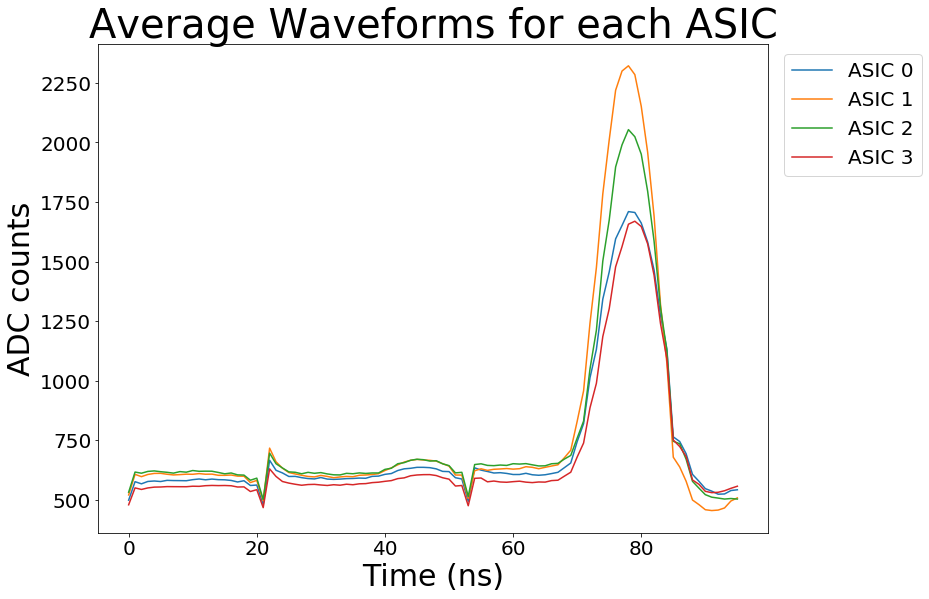

In [4]:
# Graph average waveforms for original settings

Original = []
for ASIC in range(4):
    data = np.loadtxt("/users/wipacuser/Desktop/CTA/Runs/ASIC Initialization Scans/STRB2 Duration/sampleFileLarge_run320372ASIC" + str(ASIC) + "CH6.txt") 
    waveforms = []
    for event in range(5000):
        phase = int(data[event][4])
        shift = 32 - phase - 1 + 16*(phase>=16) - 16*(phase<16)
        waveforms.append(data[event][shift: (shift + 96)])
    avg_waveform = []
    for point in range(96):
        a = []
        for event in range(5000):
            a.append(waveforms[event][point])
        avg_waveform.append(np.mean(a))
    Original.append(avg_waveform)
    plt.plot(avg_waveform, label = 'ASIC ' + str(ASIC))
plt.title('Average Waveforms for each ASIC')
plt.ylabel('ADC counts')
plt.xlabel('Time (ns)')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

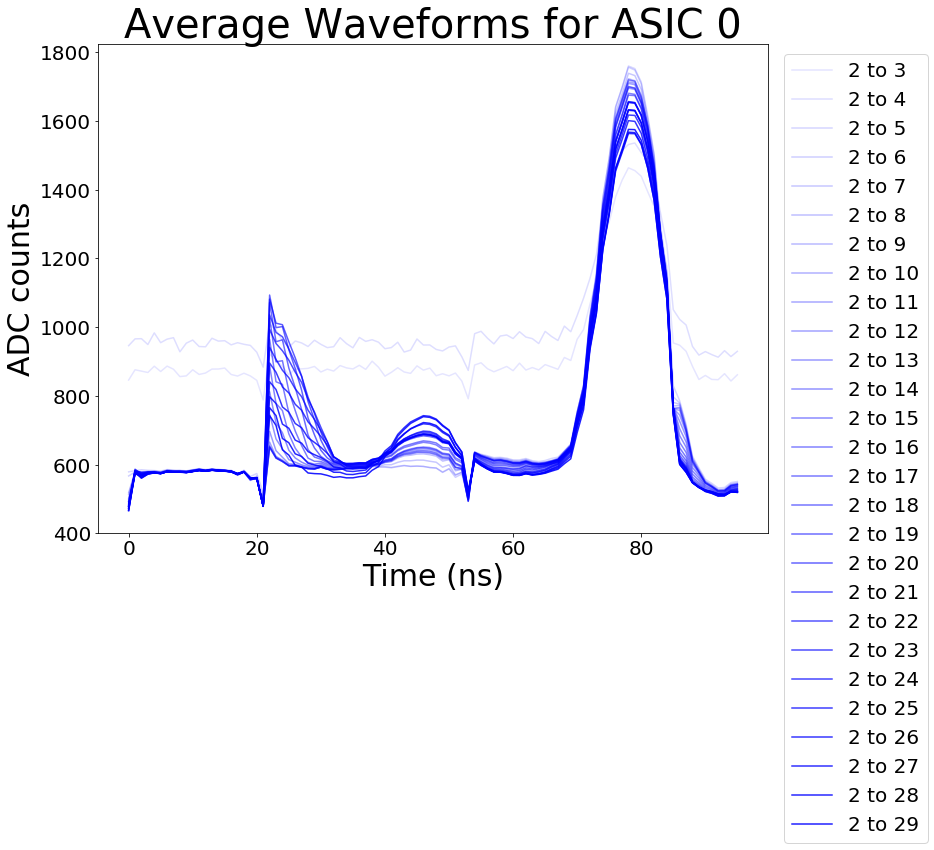

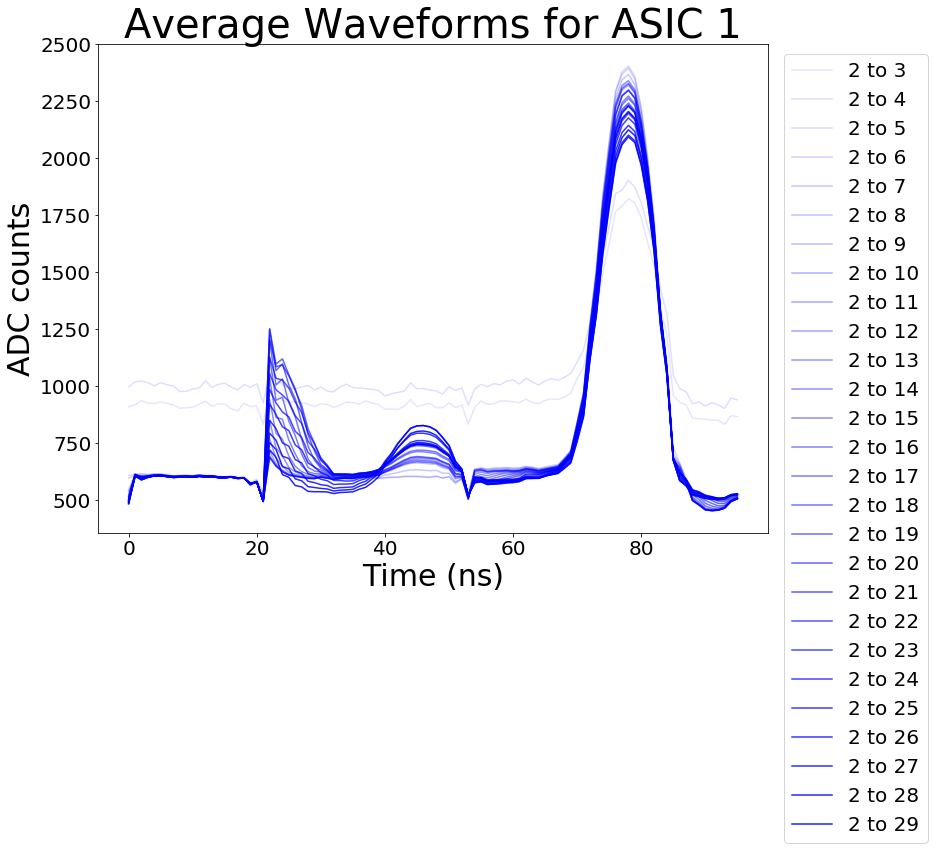

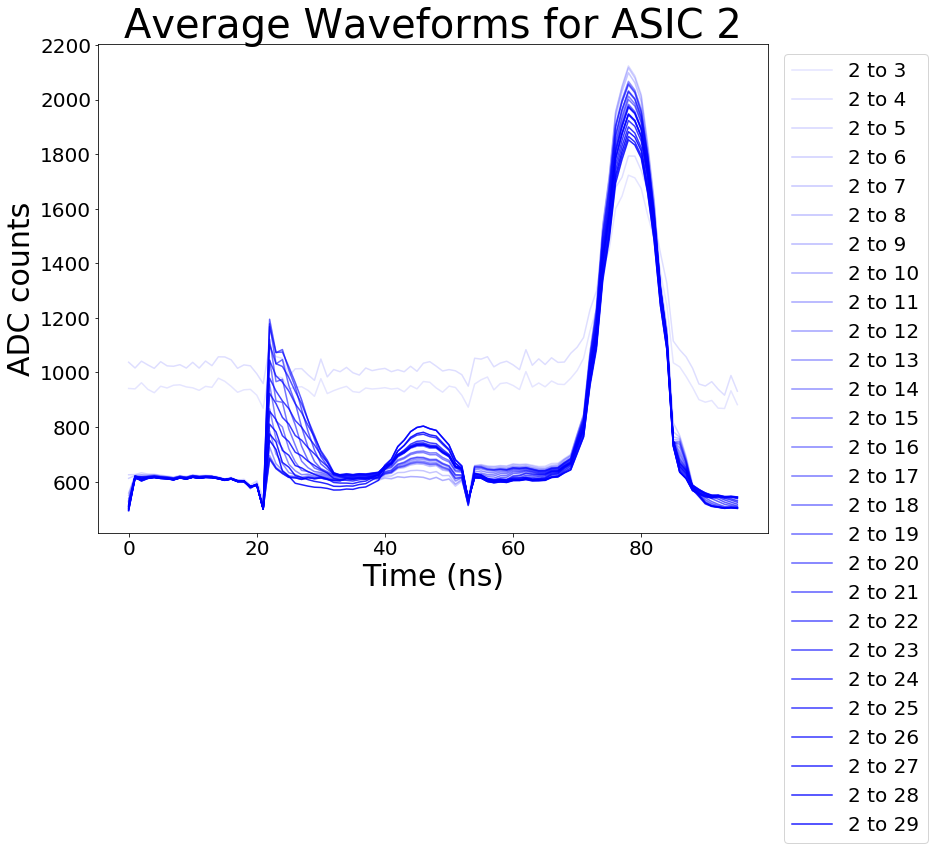

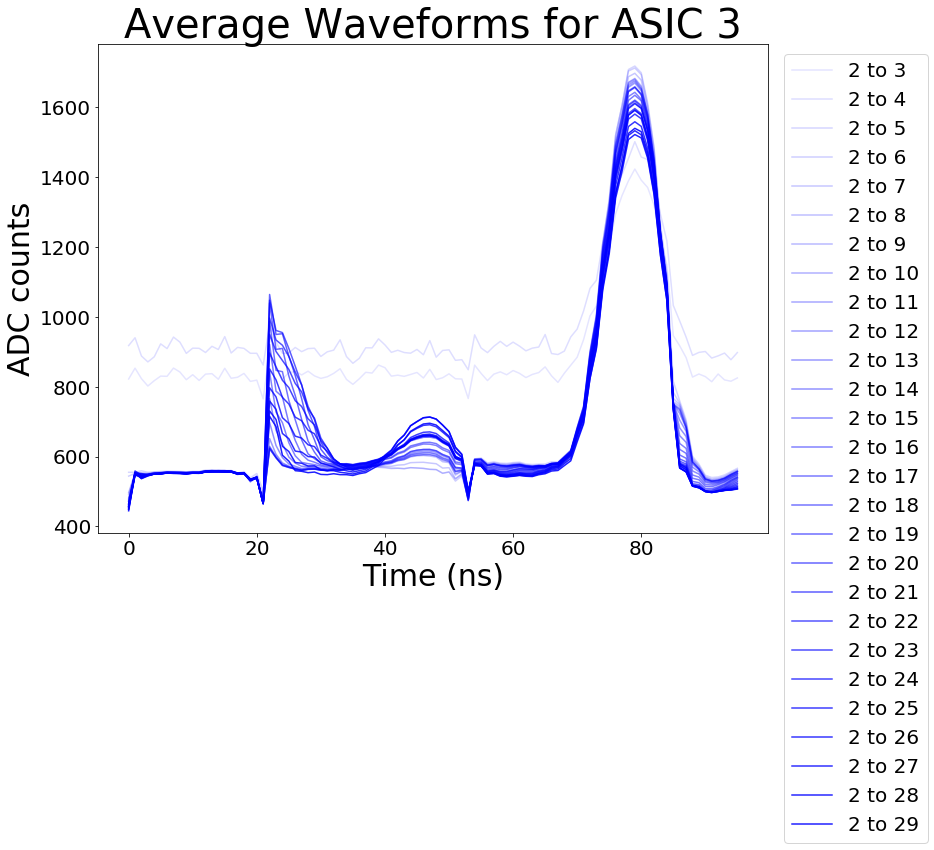

In [3]:
# Graph average waveform for each step

STRB2 = []
for ASIC in range(4):
    runs = []
    end_value = 3
    color = 0.1
    for run in range(320363,320390):
        data = np.loadtxt("/users/wipacuser/Desktop/CTA/Runs/ASIC Initialization Scans/STRB2 Duration/sampleFileLarge_run" + str(run) + "ASIC" + str(ASIC) + "CH6.txt")
        waveforms = []
        for event in range(5000):
            phase = int(data[event][4])
            shift = 32 - phase - 1 + 16*(phase>=16) - 16*(phase<16)
            waveforms.append(data[event][shift: shift+96])
        avg_waveform = []
        for point in range(96):
            a = []
            for event in range(5000):
                a.append(waveforms[event][point])
            avg_waveform.append(np.mean(a))
        runs.append(avg_waveform)
        plt.plot(avg_waveform, label = '2 to ' + str(end_value), color = 'b', alpha = color)
        end_value = end_value + 1
        color = color + 0.03
    STRB2.append(runs)
    plt.title('Average Waveforms for ASIC ' + str(ASIC))
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

In [7]:
print(shape(STRB2))

(4, 27, 96)


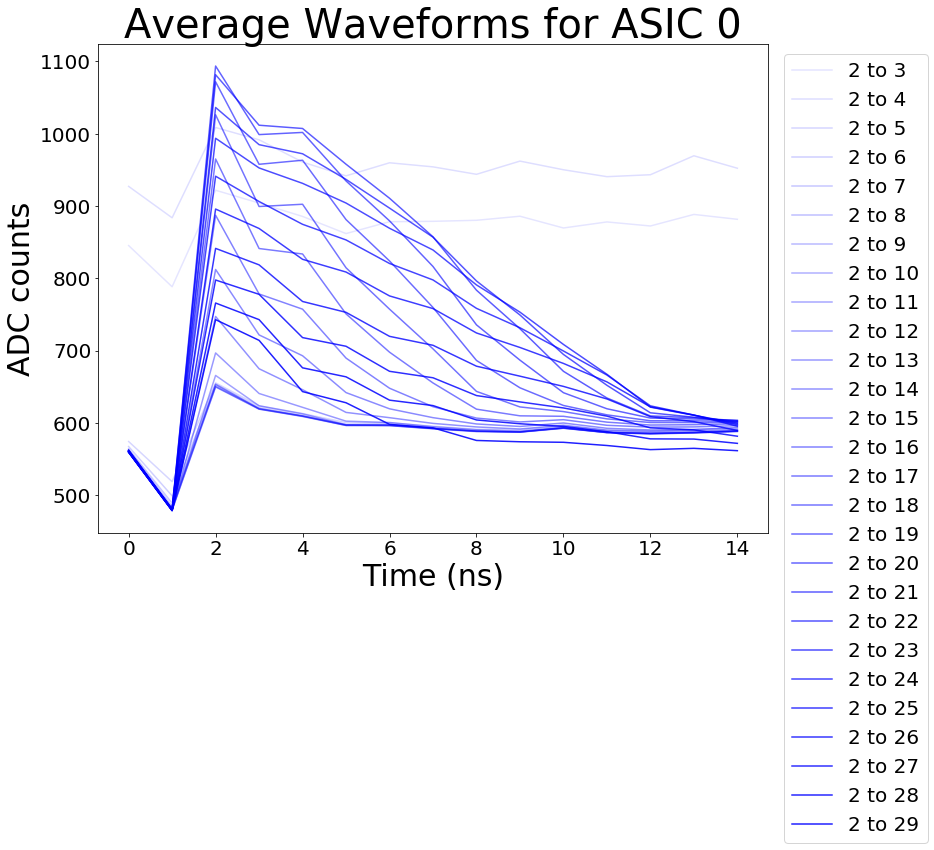

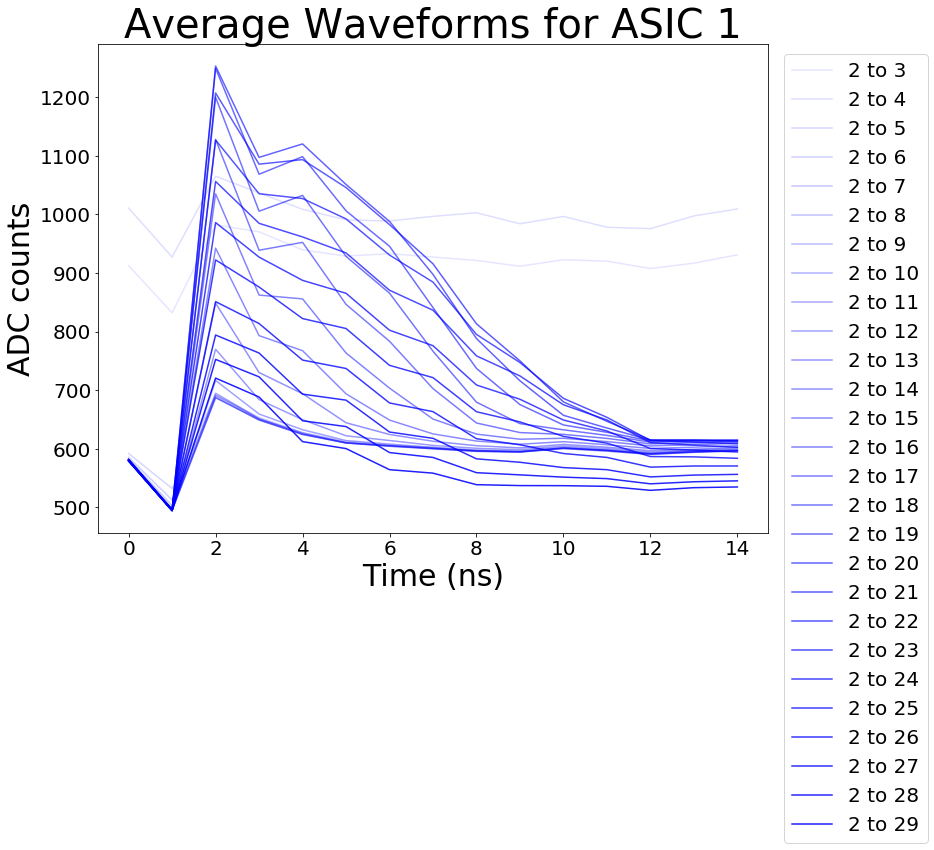

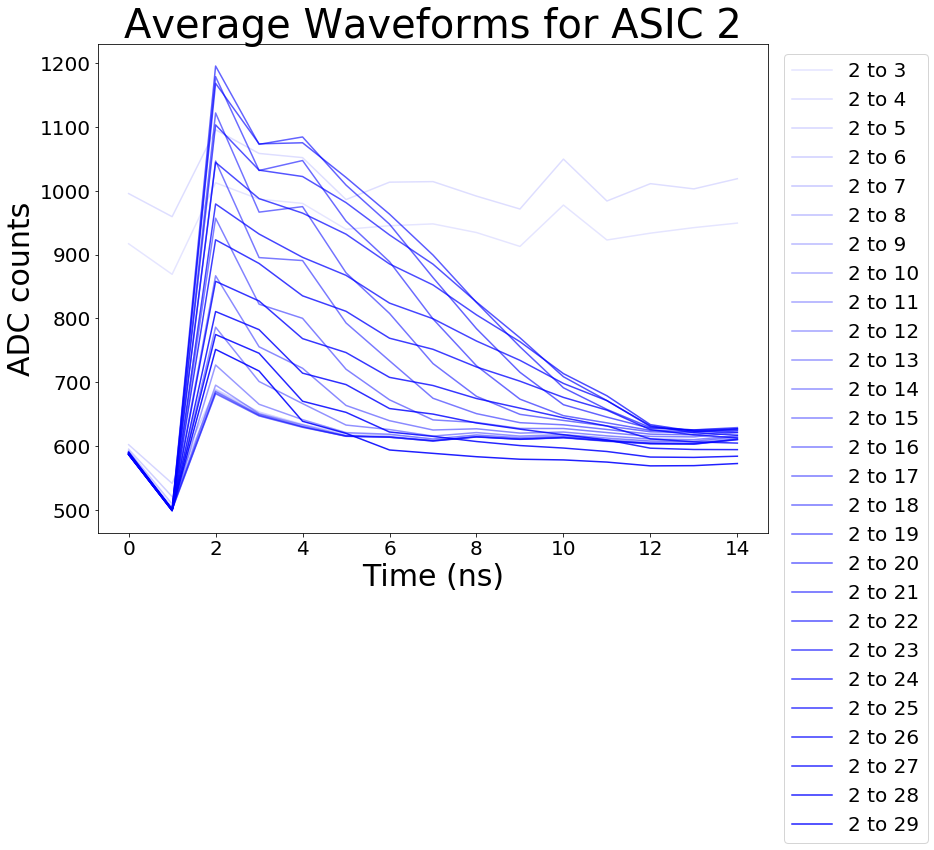

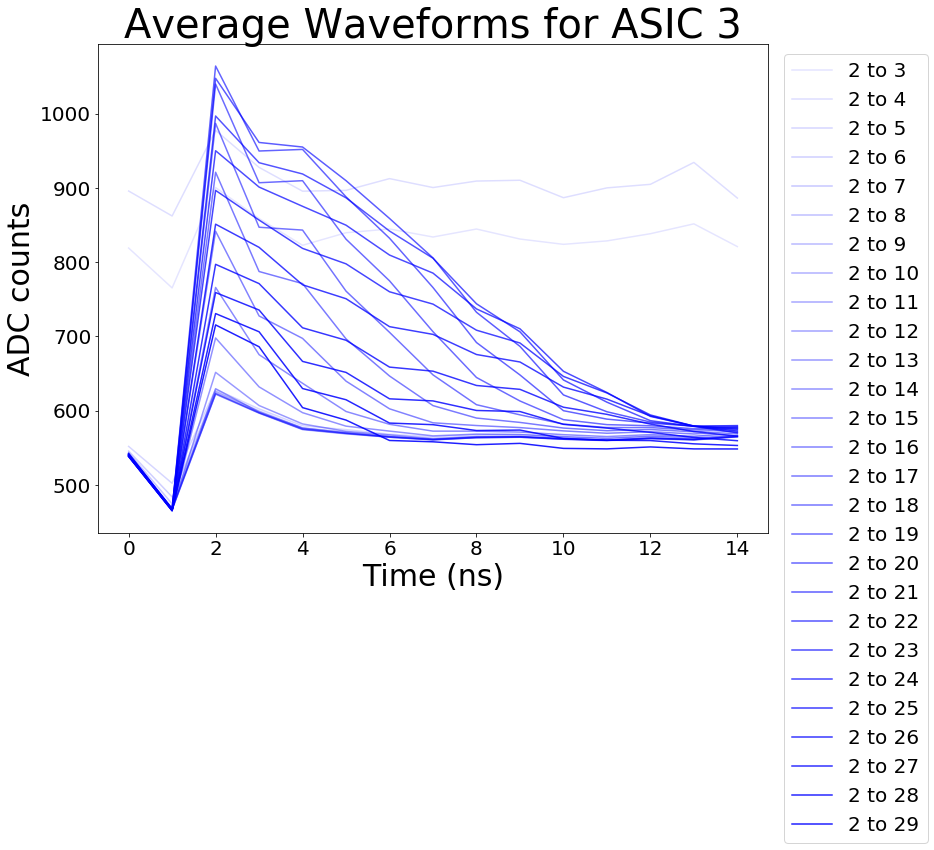

In [8]:
# Zoom in on glitch

for ASIC in range(4):
    end_value = 3
    color = 0.1
    for run in range(27):
        plt.plot(STRB2[ASIC][run][20:35], label = '2 to ' + str(end_value), color = 'b', alpha = color)
        end_value = end_value + 1
        color = color + 0.03
    plt.title('Average Waveforms for ASIC ' + str(ASIC))
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

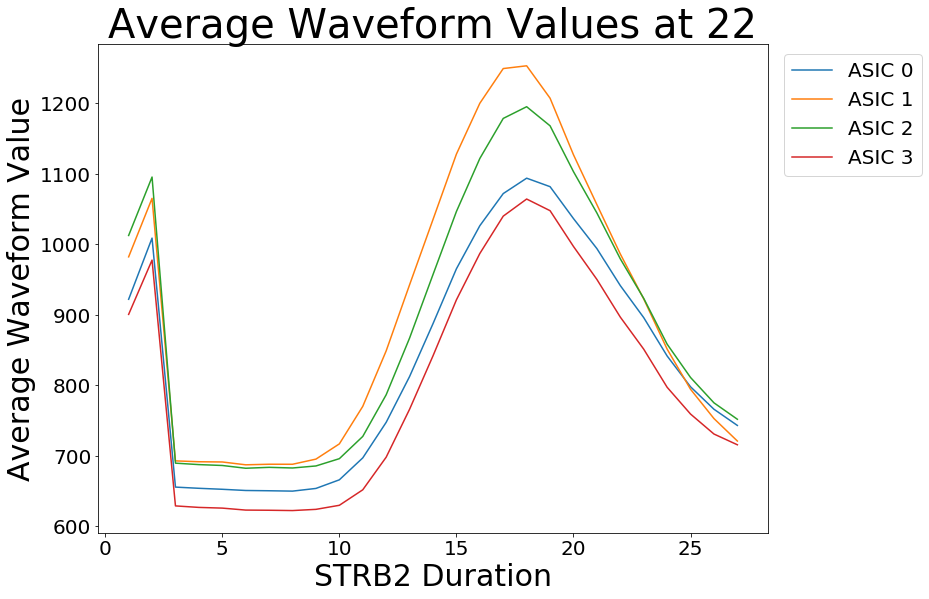

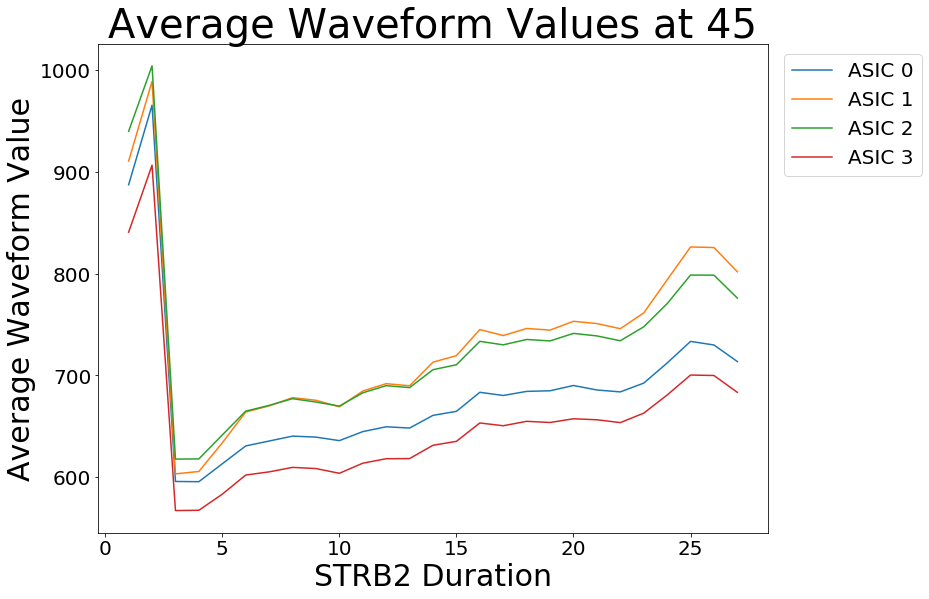

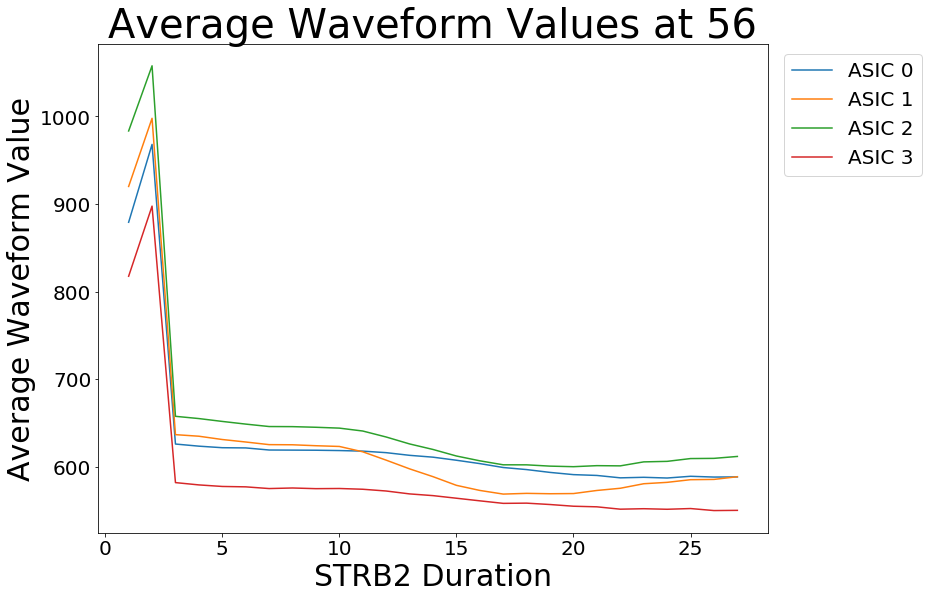

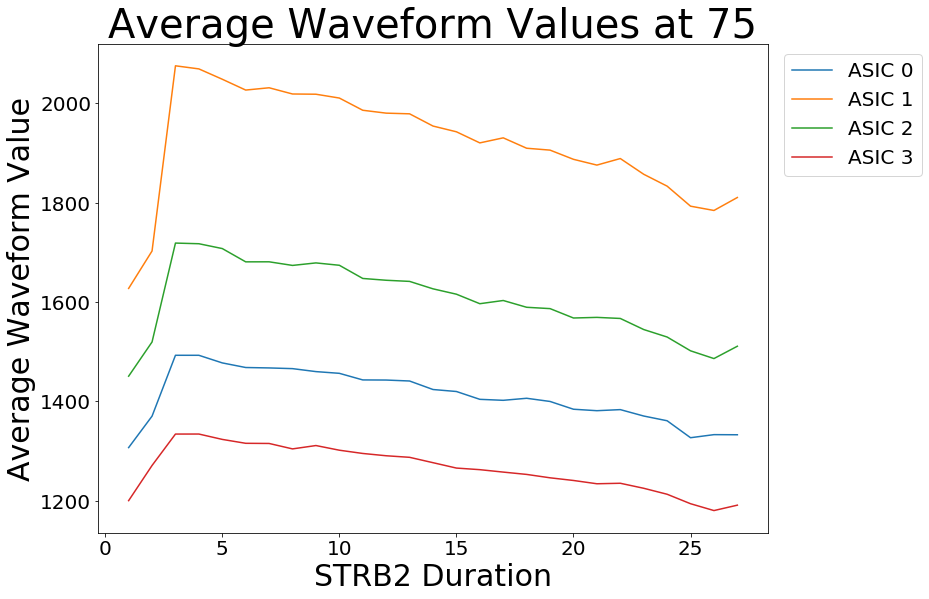

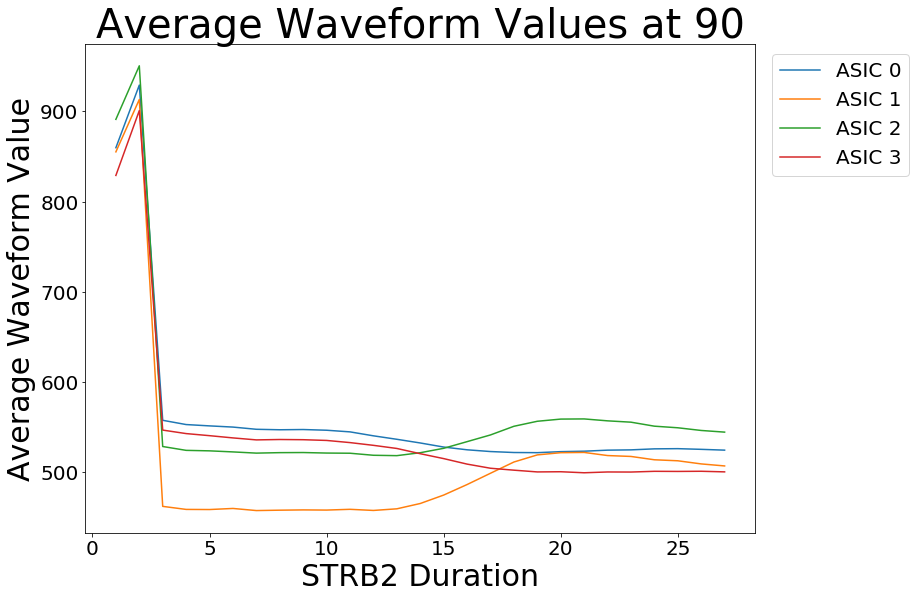

In [13]:
# Graph the value of each average waveform at 22, 56, 75, and 90. 
durations = [i for i in range(1,28)]

# at value 22
for ASIC in range(4):
    value = []
    for run in range(27):
        value.append(STRB2[ASIC][run][22])
    plt.plot(durations, value, label = 'ASIC ' + str(ASIC))
plt.title('Average Waveform Values at 22')
plt.xlabel('STRB2 Duration')
plt.ylabel('Average Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

# at value 45
for ASIC in range(4):
    value = []
    for run in range(27):
        value.append(STRB2[ASIC][run][45])
    plt.plot(durations, value, label = 'ASIC ' + str(ASIC))
plt.title('Average Waveform Values at 45')
plt.xlabel('STRB2 Duration')
plt.ylabel('Average Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

# at value 56
for ASIC in range(4):
    value = []
    for run in range(27):
        value.append(STRB2[ASIC][run][56])
    plt.plot(durations,value, label = 'ASIC ' + str(ASIC))
plt.title('Average Waveform Values at 56')
plt.xlabel('STRB2 Duration')
plt.ylabel('Average Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

# at value 75
for ASIC in range(4):
    value = []
    for run in range(27):
        value.append(STRB2[ASIC][run][75])
    plt.plot(durations,value, label = 'ASIC ' + str(ASIC))
plt.title('Average Waveform Values at 75')
plt.xlabel('STRB2 Duration')
plt.ylabel('Average Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

# at value 90
for ASIC in range(4):
    value = []
    for run in range(27):
        value.append(STRB2[ASIC][run][90])
    plt.plot(durations,value, label = 'ASIC ' + str(ASIC))
plt.title('Average Waveform Values at 90')
plt.xlabel('STRB2 Duration')
plt.ylabel('Average Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

In [11]:
## Odd Blocks Only ##

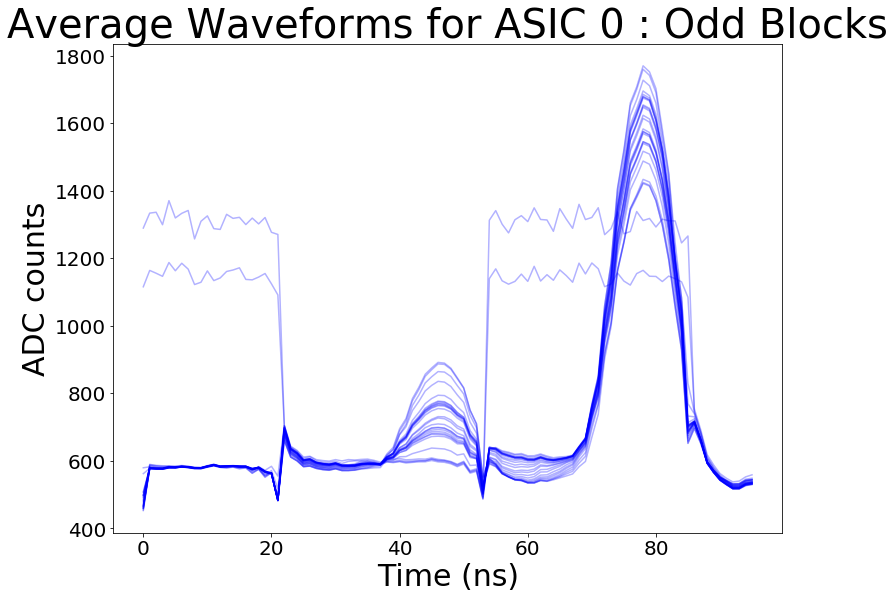

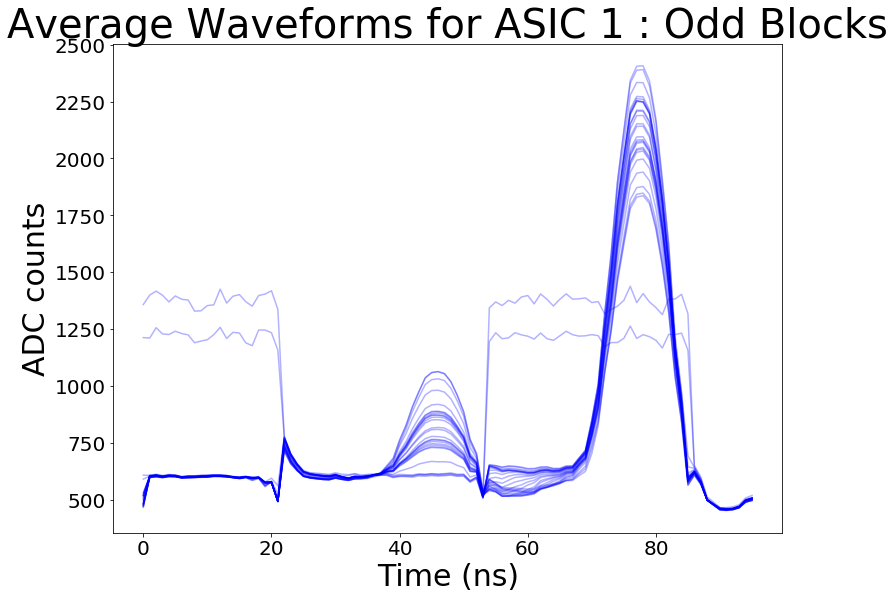

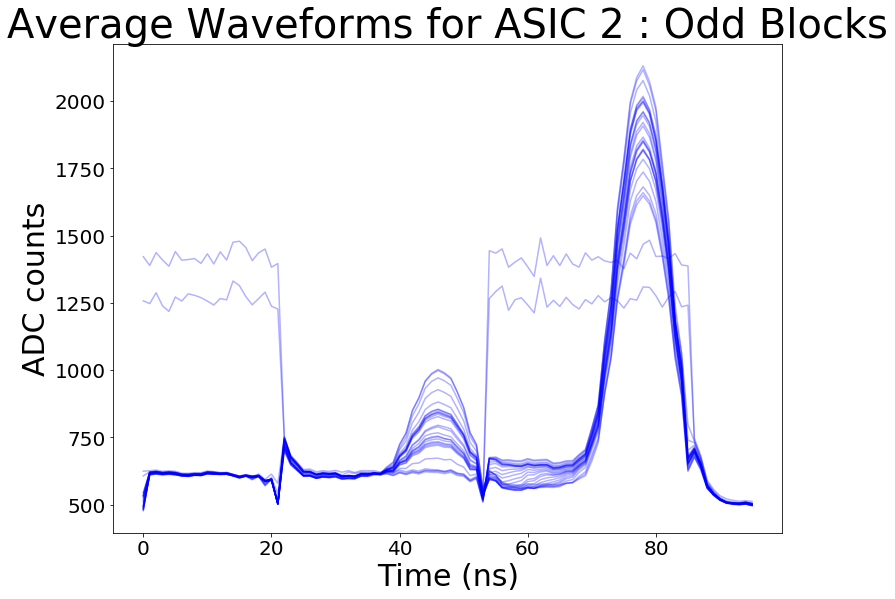

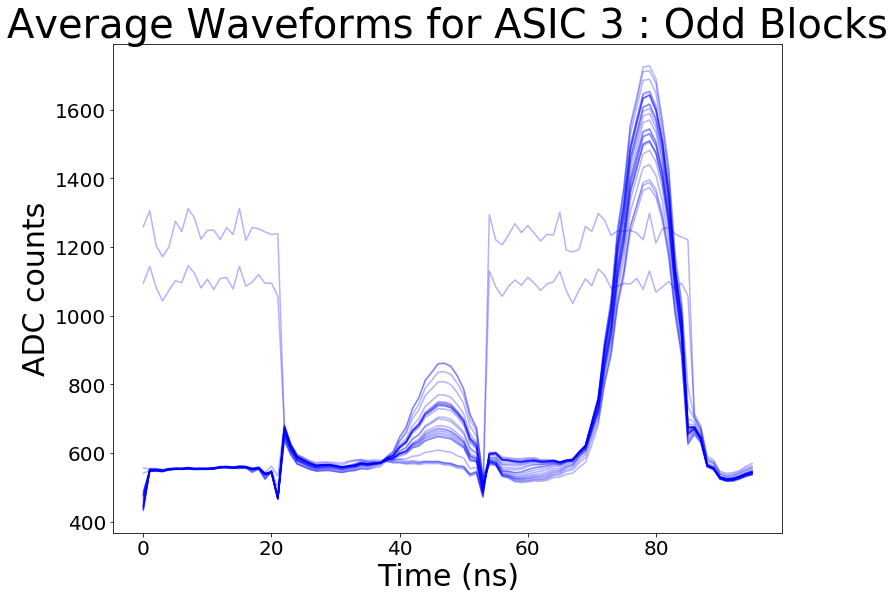

In [3]:
# Graph average waveform for only odd blocks

STRB2_odd = []
for ASIC in range(4):
    runs = []
    end_value = 36
    for run in range(320363,320390):
        data = np.loadtxt("/users/wipacuser/Desktop/CTA/Runs/ASIC Initialization Scans/STRB2 Duration/sampleFileLarge_run" + str(run) + "ASIC" + str(ASIC) + "CH6.txt")
        waveforms = []
        for event in range(5000):
            phase = int(data[event][4])
            shift = 32 - phase - 1 + 16*(phase>=16) - 16*(phase<16)
            block = int(data[event][3])
            r = block//64
            c = block%64
            block = 8*c + r
            if block%2!=0:
                waveforms.append(data[event][shift: shift+96])
        avg_waveform = []
        for point in range(96):
            a = []
            for event in range(len(waveforms)):
                a.append(waveforms[event][point])
            avg_waveform.append(np.mean(a))
        runs.append(avg_waveform)
        plt.plot(avg_waveform, label = '35 to ' + str(end_value), color = 'b', alpha = 0.3)
        end_value = end_value + 1
    STRB2_odd.append(runs)
    plt.title('Average Waveforms for ASIC ' + str(ASIC) + ' : Odd Blocks')
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.show()

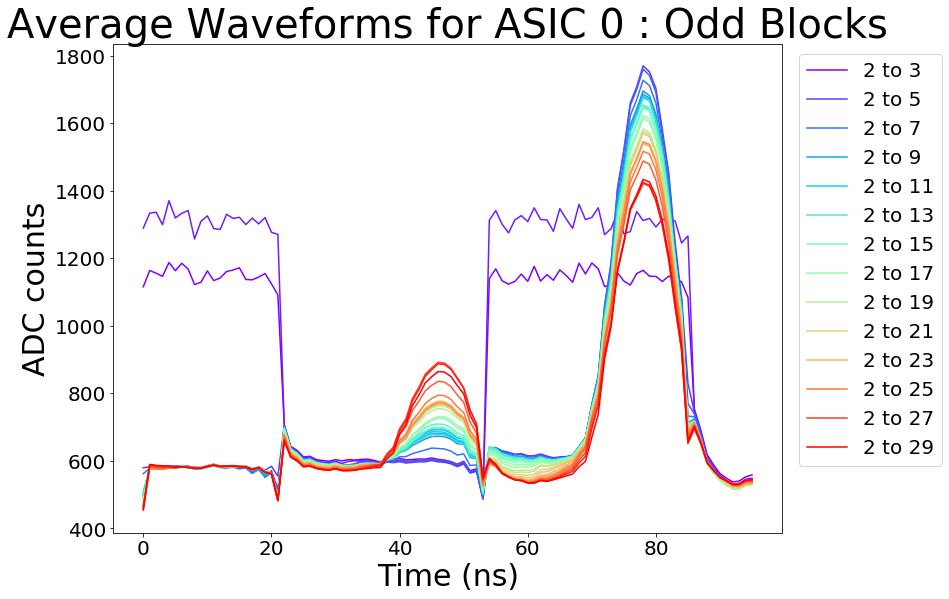

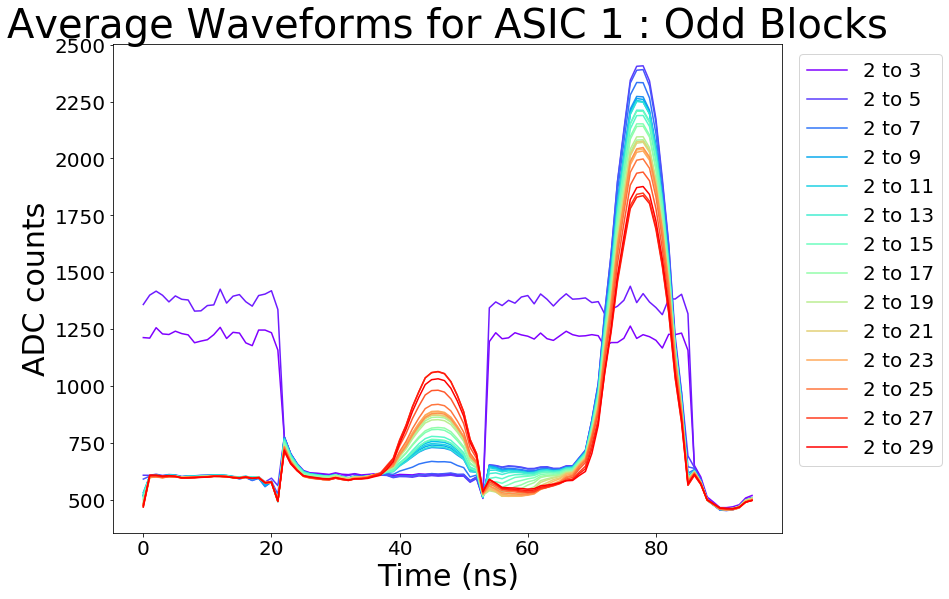

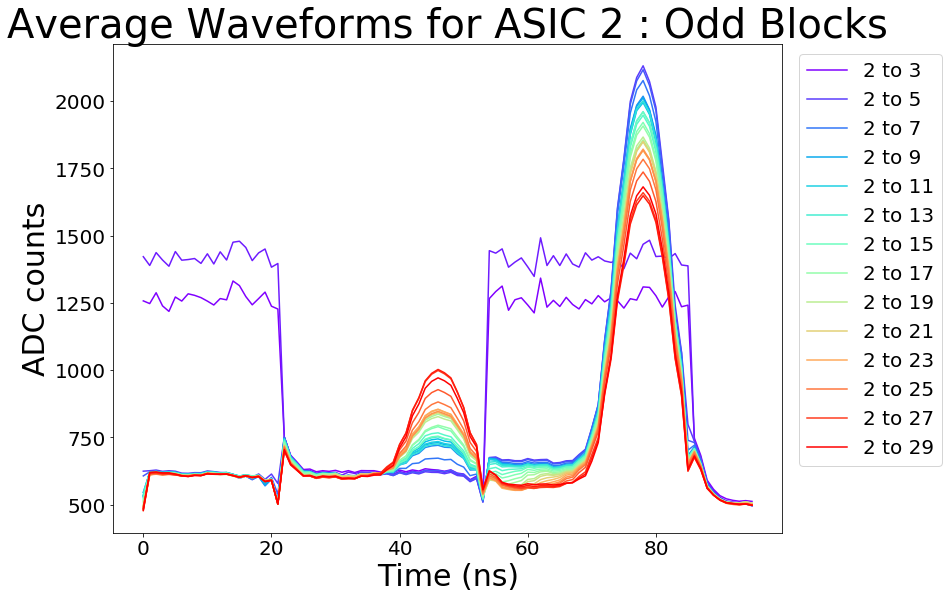

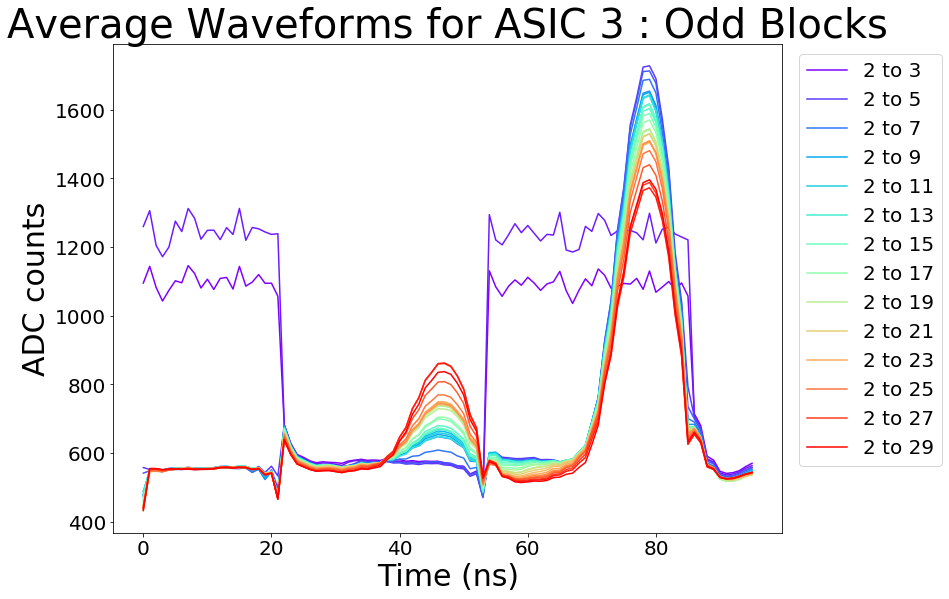

In [8]:
# Plot with rainbow colormap

number_runs = 27
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, number_runs)]

for ASIC in range(4):
    end_value = 3
    for run in range(27):
        if run%2==0:
            plt.plot(STRB2_odd[ASIC][run], label = '2 to ' + str(end_value), color = colors[run])
            end_value = end_value + 1
        else:
            plt.plot(STRB2_odd[ASIC][run], color = colors[run])
            end_value = end_value + 1
    plt.title('Average Waveforms for ASIC ' + str(ASIC) + ' : Odd Blocks')
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

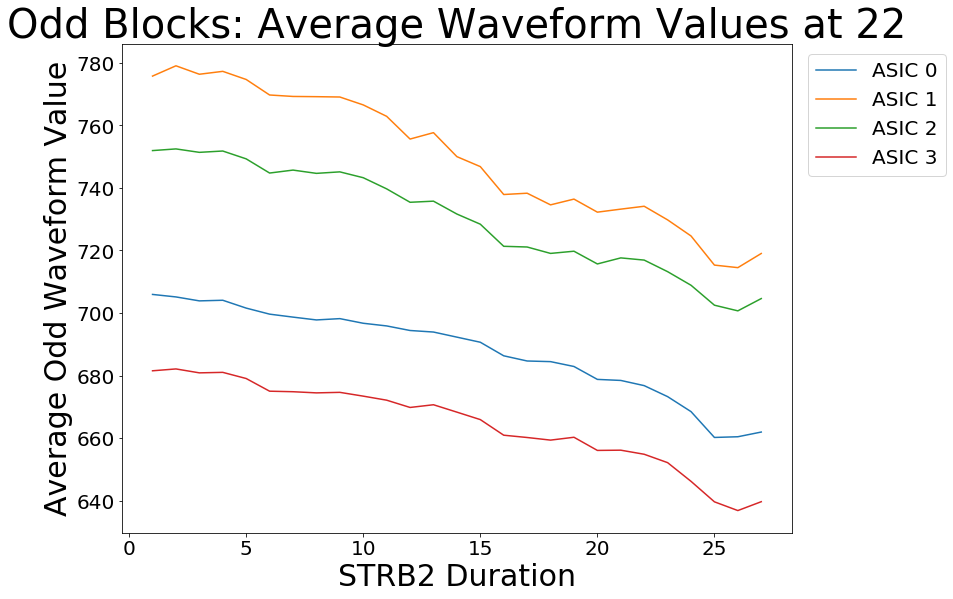

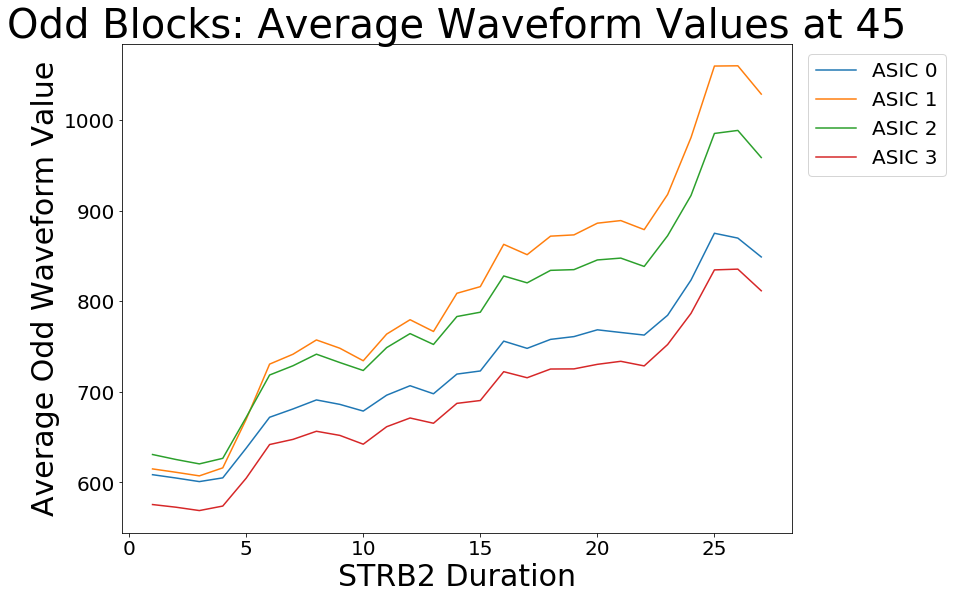

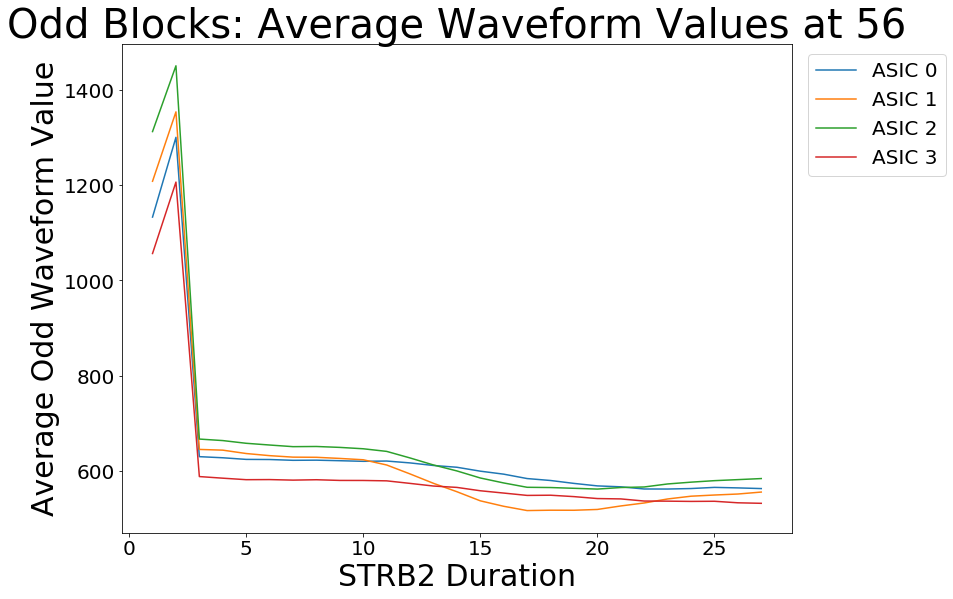

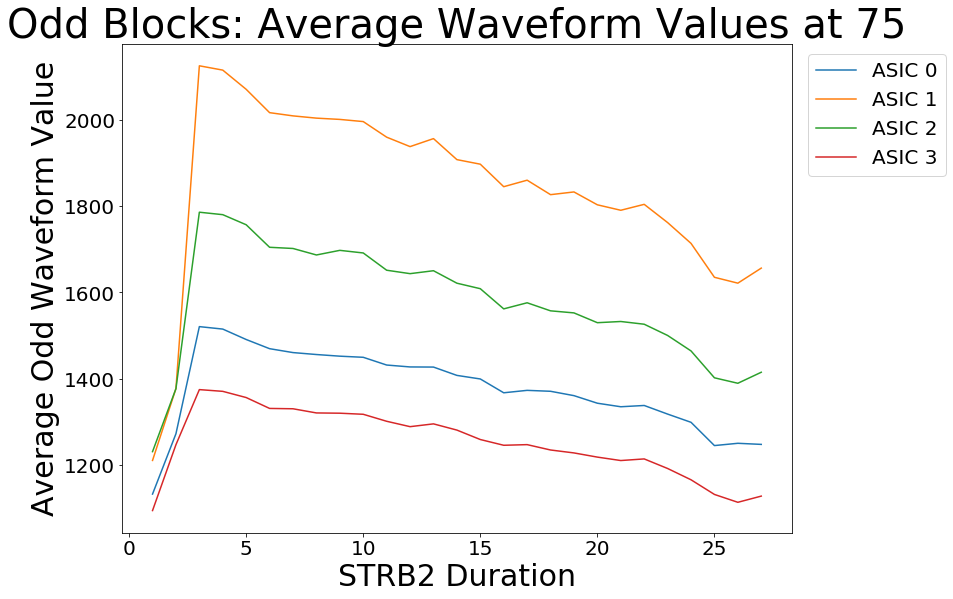

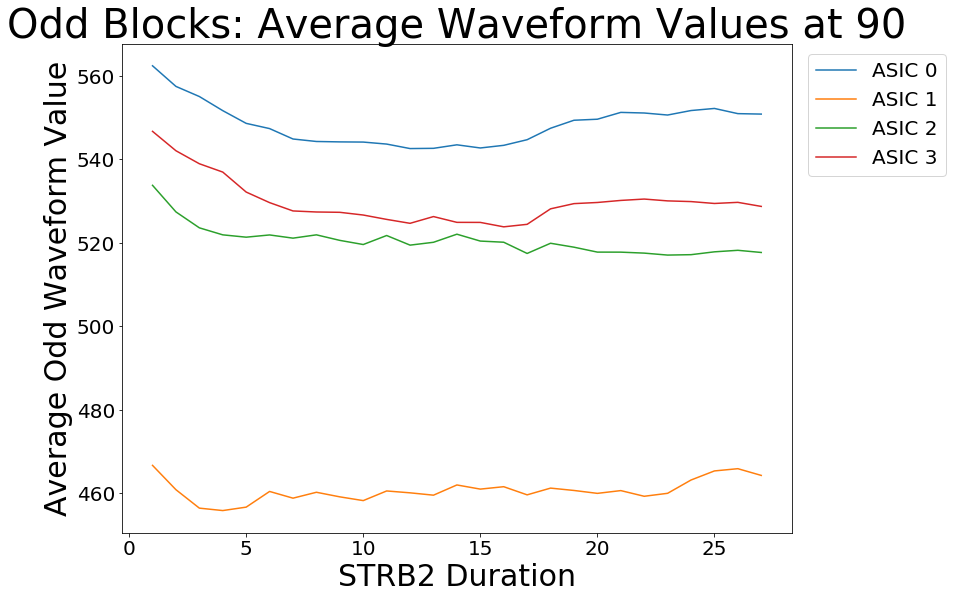

In [4]:
# Graph the value of each average waveform at 22, 56, 75, and 90. 
durations = [i for i in range(1,28)]

# at value 22
for ASIC in range(4):
    value = []
    for run in range(27):
        value.append(STRB2_odd[ASIC][run][22])
    plt.plot(durations, value, label = 'ASIC ' + str(ASIC))
plt.title('Odd Blocks: Average Waveform Values at 22')
plt.xlabel('STRB2 Duration')
plt.ylabel('Average Odd Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

# at value 45
for ASIC in range(4):
    value = []
    for run in range(27):
        value.append(STRB2_odd[ASIC][run][45])
    plt.plot(durations, value, label = 'ASIC ' + str(ASIC))
plt.title('Odd Blocks: Average Waveform Values at 45')
plt.xlabel('STRB2 Duration')
plt.ylabel('Average Odd Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

# at value 56
for ASIC in range(4):
    value = []
    for run in range(27):
        value.append(STRB2_odd[ASIC][run][56])
    plt.plot(durations,value, label = 'ASIC ' + str(ASIC))
plt.title('Odd Blocks: Average Waveform Values at 56')
plt.xlabel('STRB2 Duration')
plt.ylabel('Average Odd Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

# at value 75
for ASIC in range(4):
    value = []
    for run in range(27):
        value.append(STRB2_odd[ASIC][run][75])
    plt.plot(durations,value, label = 'ASIC ' + str(ASIC))
plt.title('Odd Blocks: Average Waveform Values at 75')
plt.xlabel('STRB2 Duration')
plt.ylabel('Average Odd Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

# at value 90
for ASIC in range(4):
    value = []
    for run in range(27):
        value.append(STRB2_odd[ASIC][run][90])
    plt.plot(durations,value, label = 'ASIC ' + str(ASIC))
plt.title('Odd Blocks: Average Waveform Values at 90')
plt.xlabel('STRB2 Duration')
plt.ylabel('Average Odd Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

In [15]:
## Even Blocks Only ##

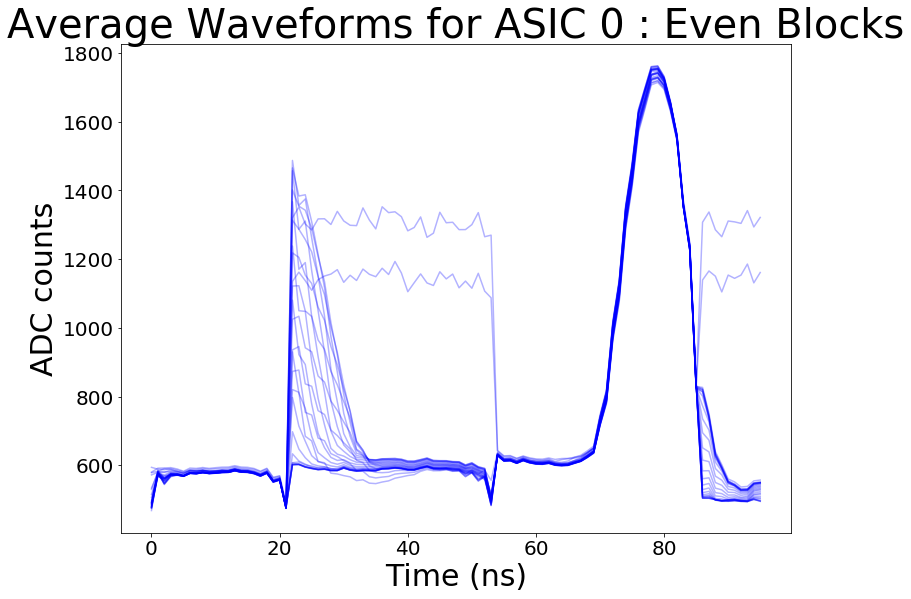

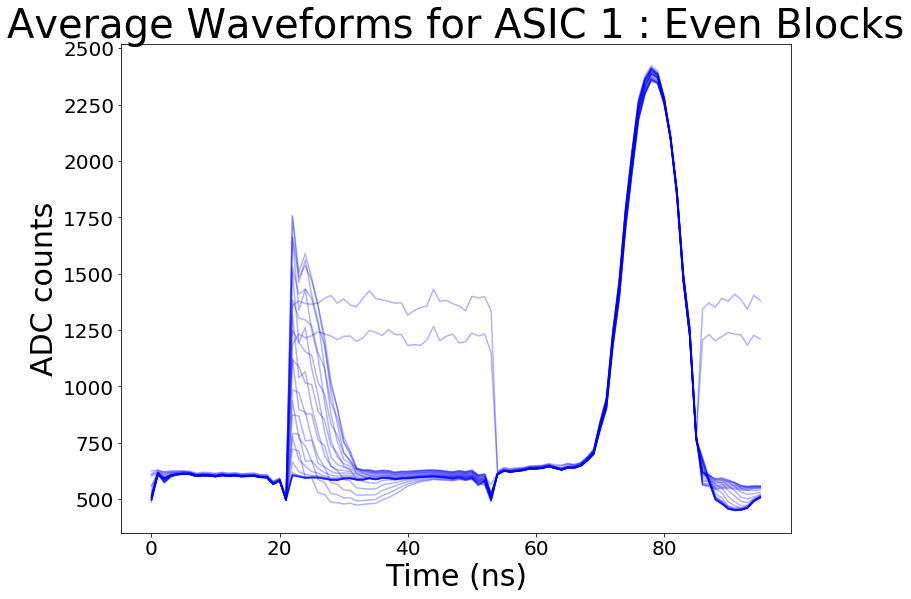

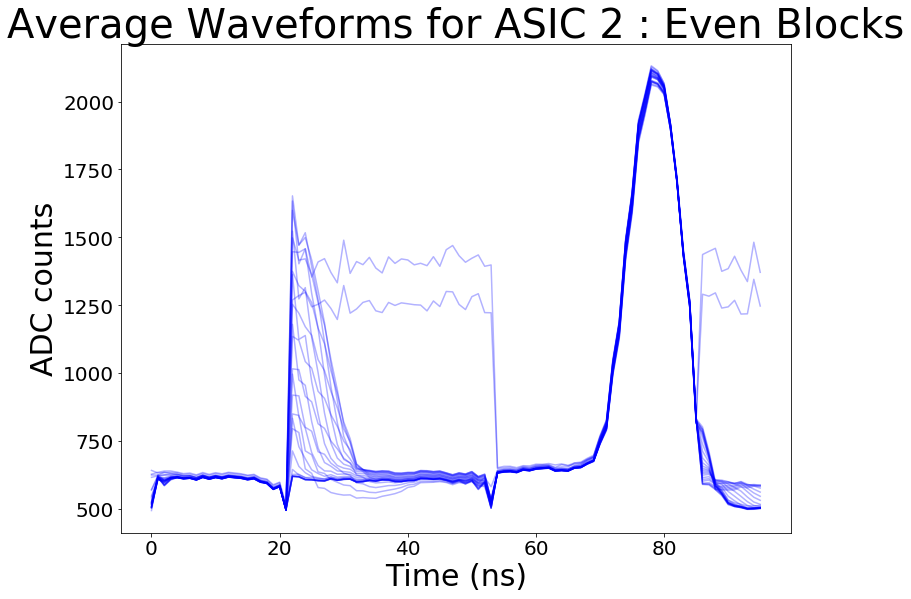

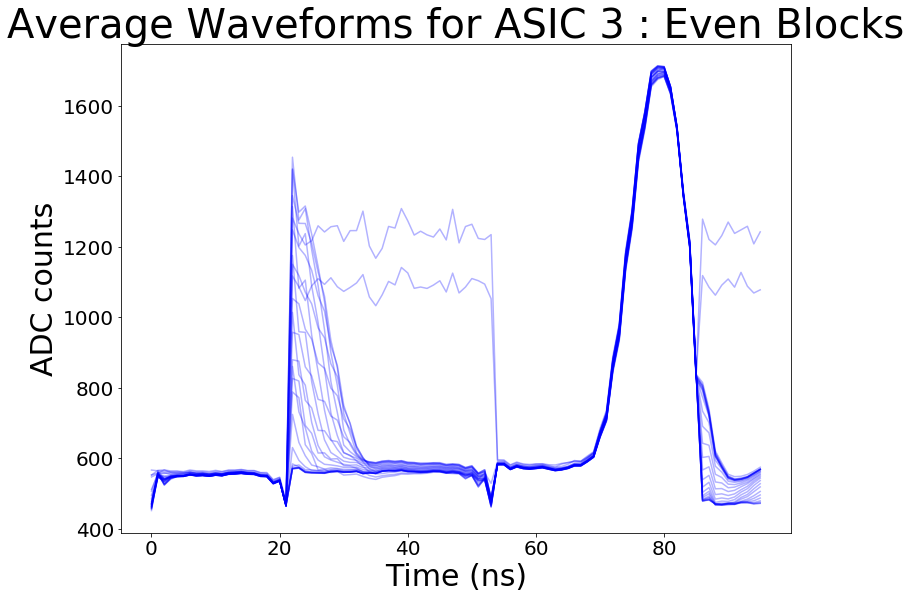

In [5]:
# Graph average waveform for only even blocks

STRB2_even = []
for ASIC in range(4):
    runs = []
    end_value = 36
    for run in range(320363,320390):
        data = np.loadtxt("/users/wipacuser/Desktop/CTA/Runs/ASIC Initialization Scans/STRB2 Duration/sampleFileLarge_run" + str(run) + "ASIC" + str(ASIC) + "CH6.txt")
        waveforms = []
        for event in range(5000):
            phase = int(data[event][4])
            shift = 32 - phase - 1 + 16*(phase>=16) - 16*(phase<16)
            block = int(data[event][3])
            r = block//64
            c = block%64
            block = 8*c + r
            if block%2==0:
                waveforms.append(data[event][shift: shift+96])
        avg_waveform = []
        for point in range(96):
            a = []
            for event in range(len(waveforms)):
                a.append(waveforms[event][point])
            avg_waveform.append(np.mean(a))
        runs.append(avg_waveform)
        plt.plot(avg_waveform, label = '35 to ' + str(end_value), color = 'b', alpha = 0.3)
        end_value = end_value + 1
    STRB2_even.append(runs)
    plt.title('Average Waveforms for ASIC ' + str(ASIC) + ' : Even Blocks')
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.show()

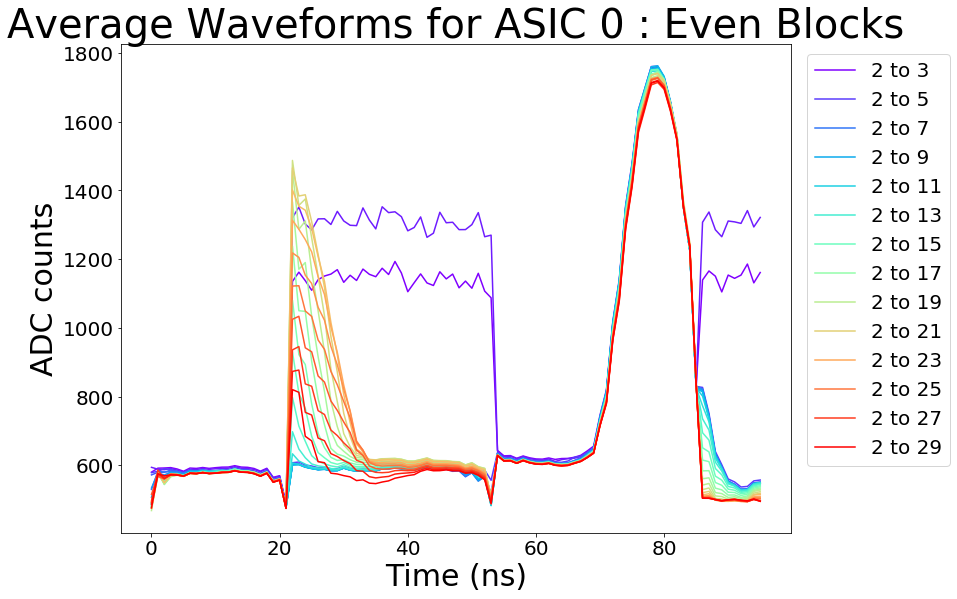

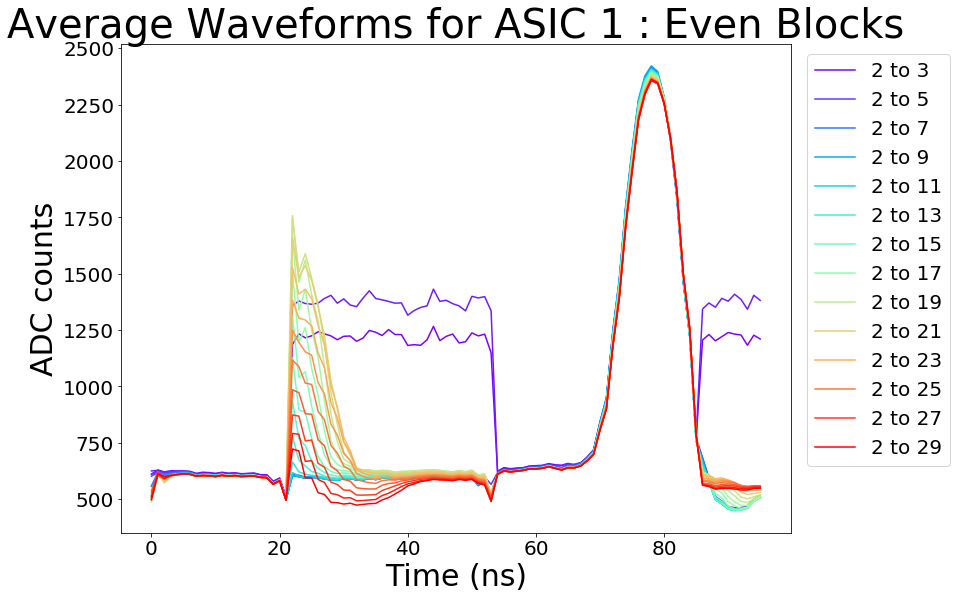

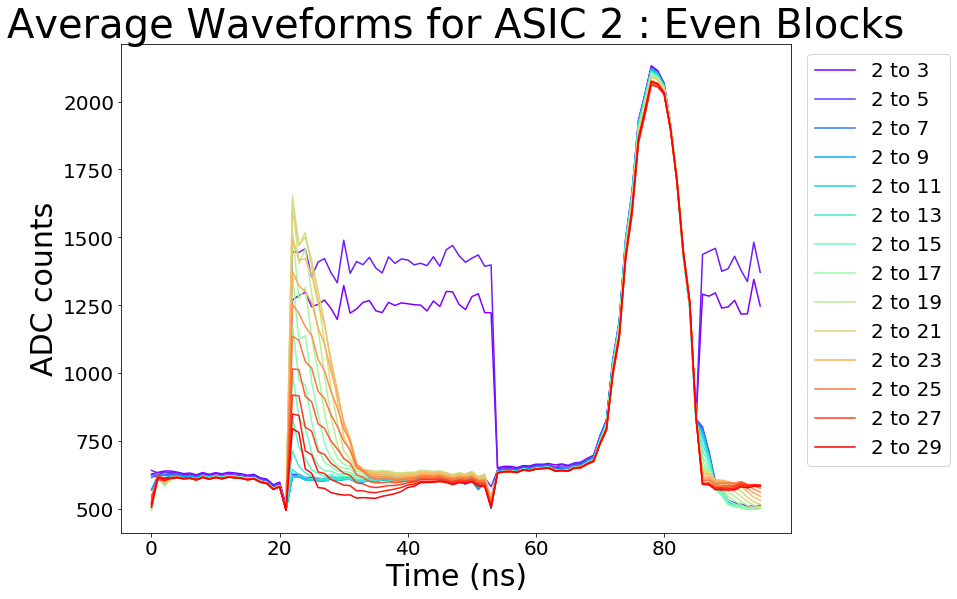

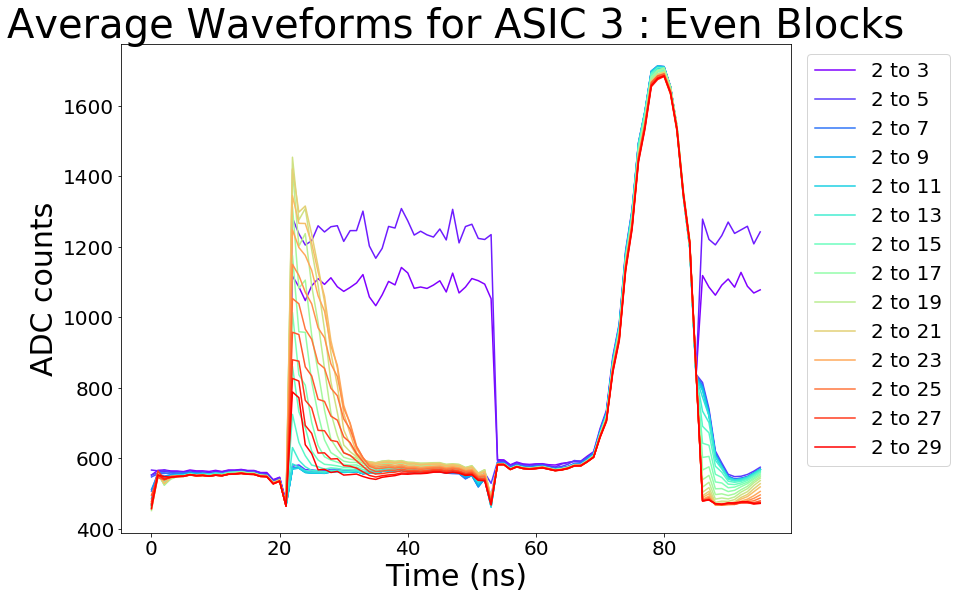

In [12]:
# Plot with rainbow colormap

number_runs = 27
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, number_runs)]

for ASIC in range(4):
    end_value = 3
    for run in range(27):
        if run%2==0:
            plt.plot(STRB2_even[ASIC][run], label = '2 to ' + str(end_value), color = colors[run])
            end_value = end_value + 1
        else:
            plt.plot(STRB2_even[ASIC][run], color = colors[run])
            end_value = end_value + 1
    plt.title('Average Waveforms for ASIC ' + str(ASIC) + ' : Even Blocks')
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

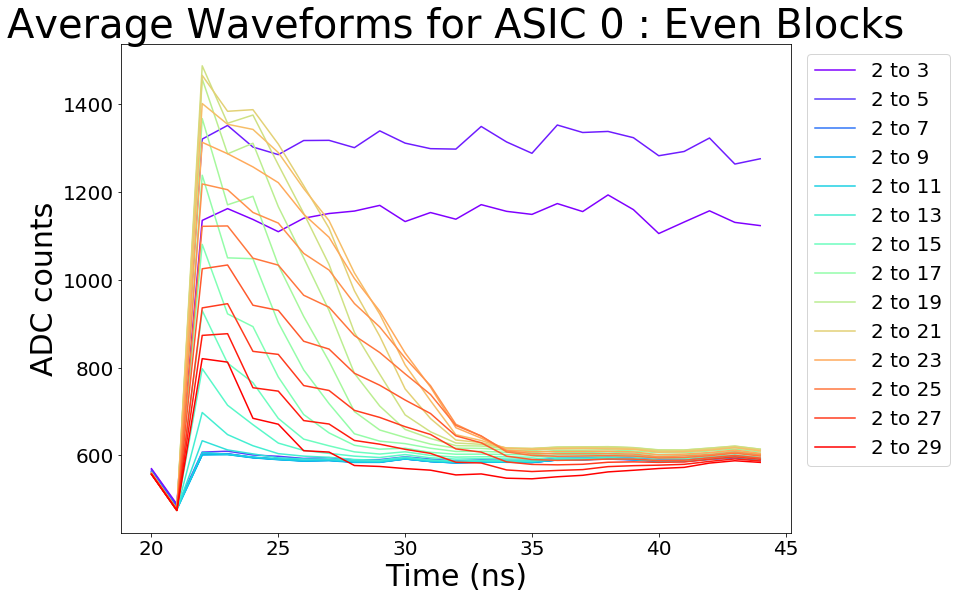

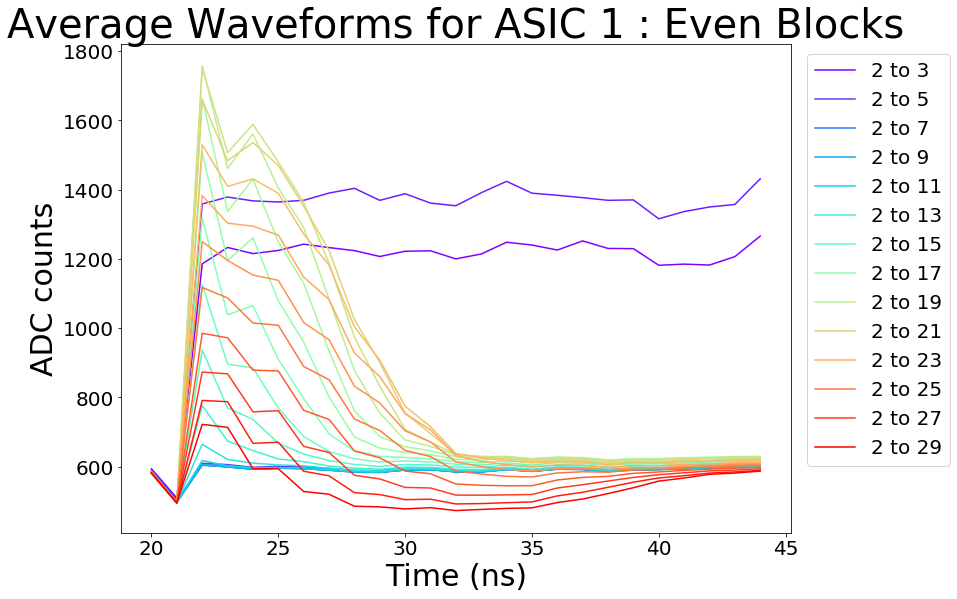

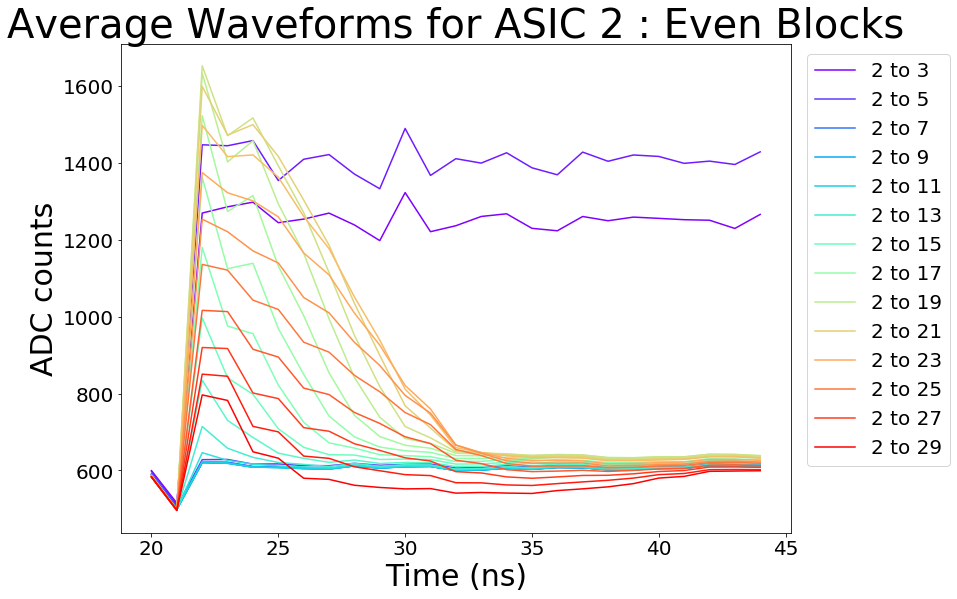

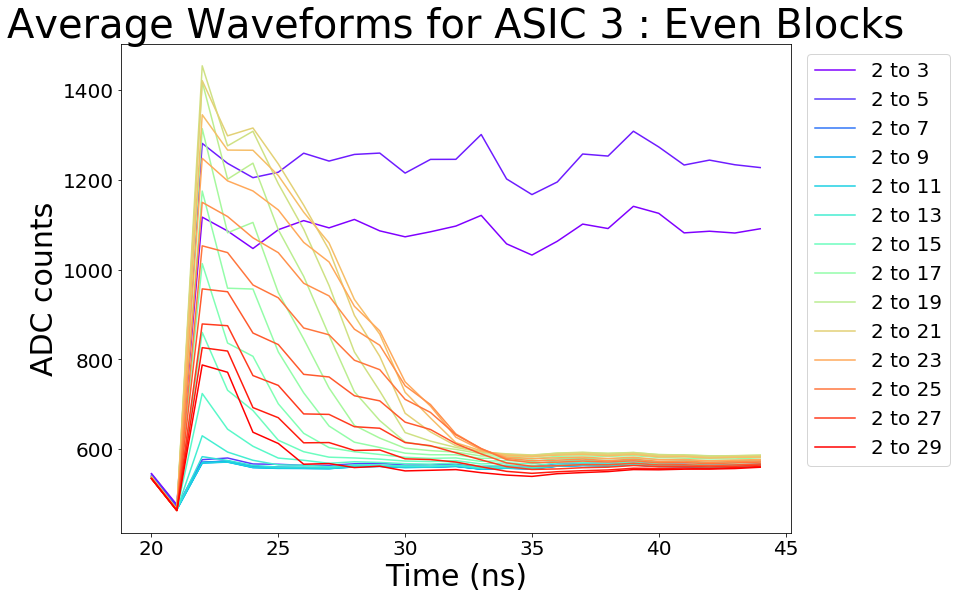

In [11]:
# Zoom in on 20-45

number_runs = 27
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, number_runs)]

time = [x for x in range(20,45)]
for ASIC in range(4):
    end_value = 3
    for run in range(27):
        if run%2==0:
            plt.plot(time, STRB2_even[ASIC][run][20:45], label = '2 to ' + str(end_value), color = colors[run])
            end_value = end_value + 1
        else:
            plt.plot(time, STRB2_even[ASIC][run][20:45], color = colors[run])
            end_value = end_value + 1
    plt.title('Average Waveforms for ASIC ' + str(ASIC) + ' : Even Blocks')
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

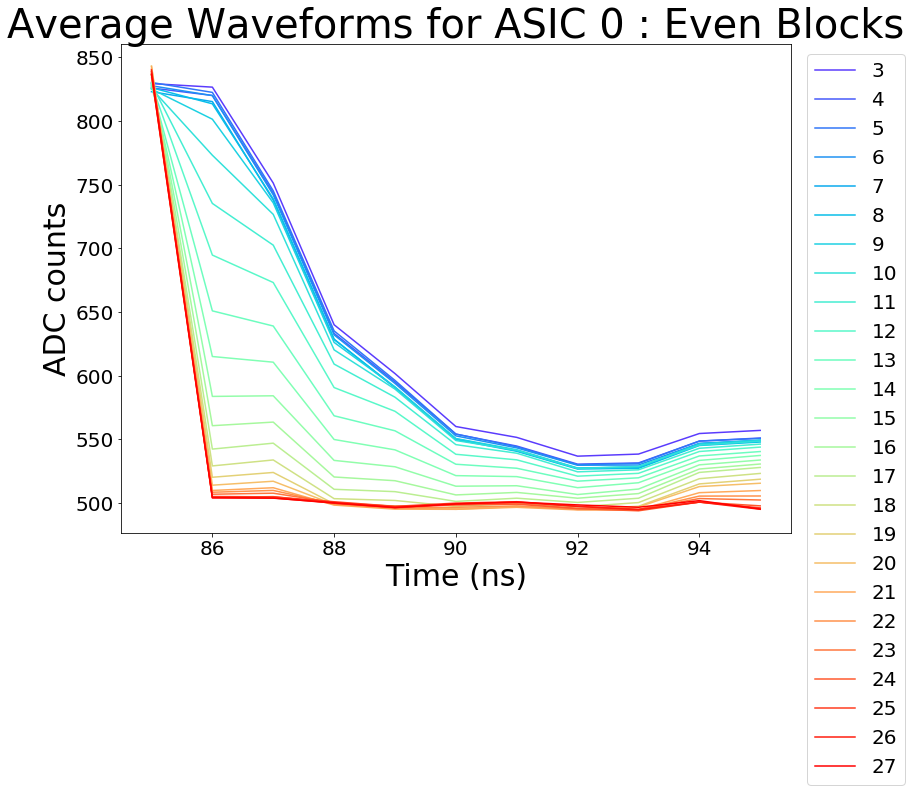

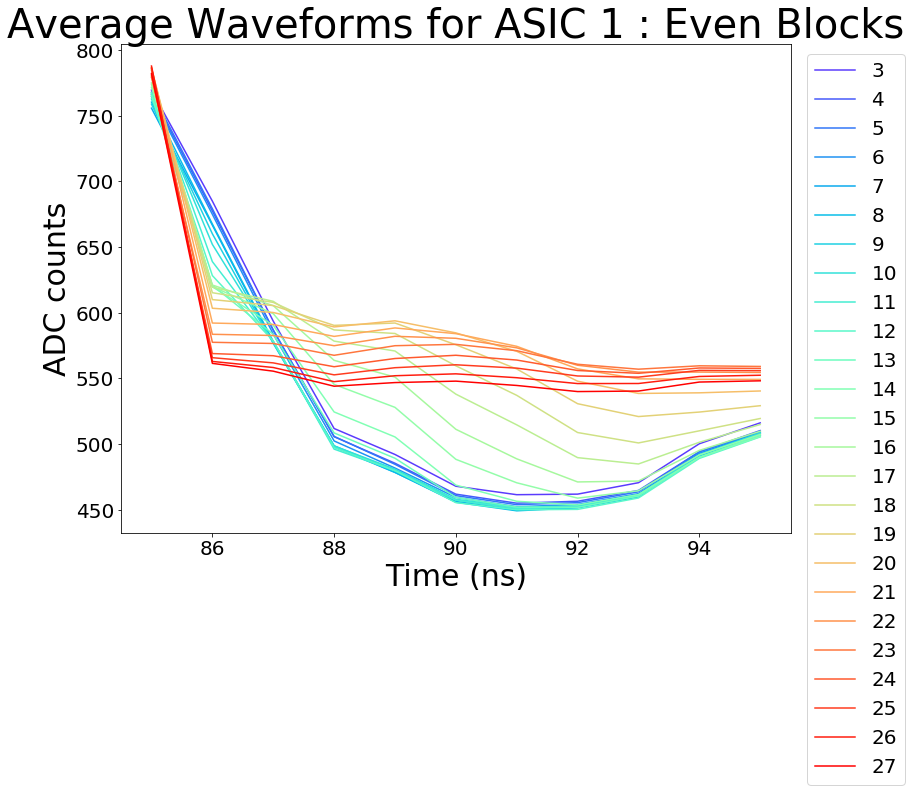

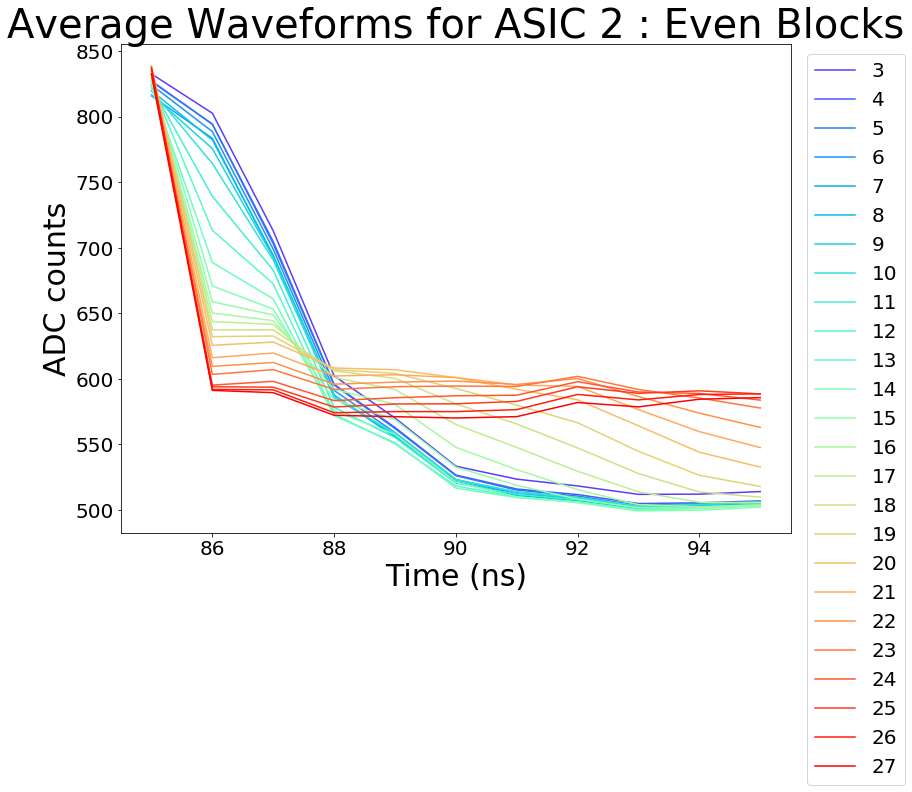

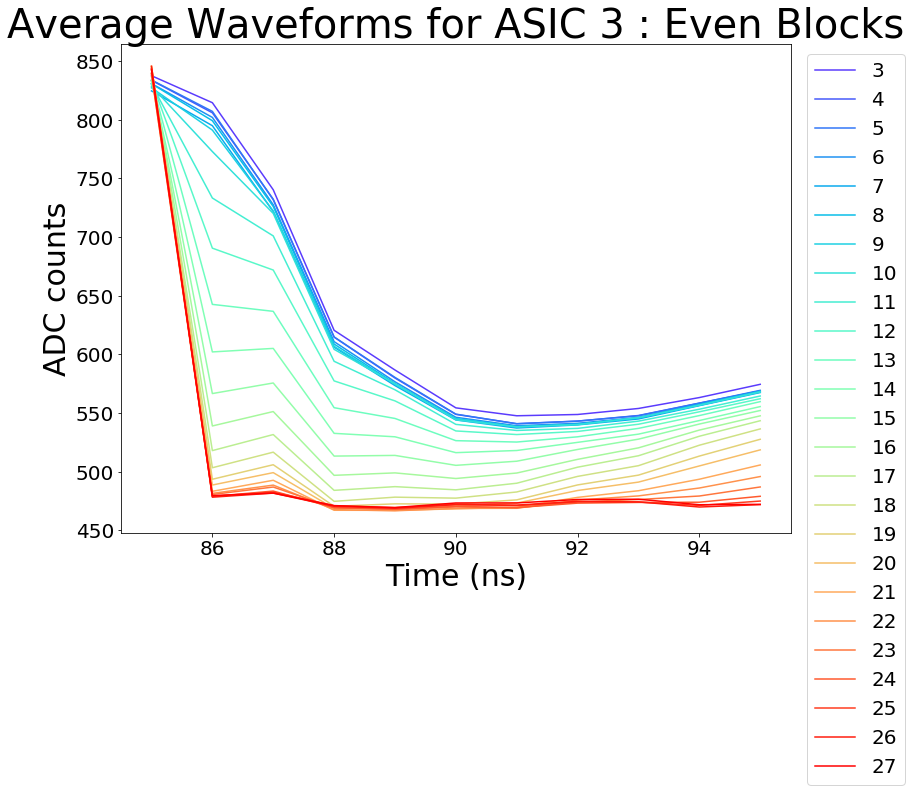

In [17]:
# Zoom in on 85-96

number_runs = 27
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, number_runs)]

time = [x for x in range(85,96)]
for ASIC in range(4):
    length = 3
    for run in range(25):
        plt.plot(time, STRB2_even[ASIC][run+2][85:96], label = str(length), color = colors[run + 2])
        length = length + 1
    plt.title('Average Waveforms for ASIC ' + str(ASIC) + ' : Even Blocks')
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

ASIC 0
[1135.1642800318218, 1320.3613138686133, 607.32459276916961, 602.38421264599276, 601.910411622276, 601.98132697655944, 601.40832666132906, 601.38904438224711, 606.62770739681241, 633.2720228384992, 697.5855636658556, 797.3108424336973, 929.71092503987245, 1080.4729083665338, 1238.0430965682363, 1367.0520833333333, 1457.2858283433134, 1487.3088697017267, 1465.4943070278759, 1401.2954729183509, 1312.9746376811595, 1218.1740376740377, 1121.6569931479241, 1024.9150515463919, 935.86597110754417, 873.22828282828277, 820.1859827721222]
ASIC 1
[1185.8178202068416, 1358.8065693430658, 609.72626142232821, 604.02980265807491, 605.66787732041973, 605.20659515295984, 606.05004003202566, 606.22670931627351, 617.66653044544341, 664.6725122349103, 776.91605839416059, 936.88533541341656, 1125.8975279106858, 1317.5968127490039, 1506.8495610534717, 1663.3120993589744, 1757.9105788423153, 1751.9591836734694, 1660.3698468786808, 1529.6851253031527, 1383.1235909822867, 1249.945126945127, 1117.7335751

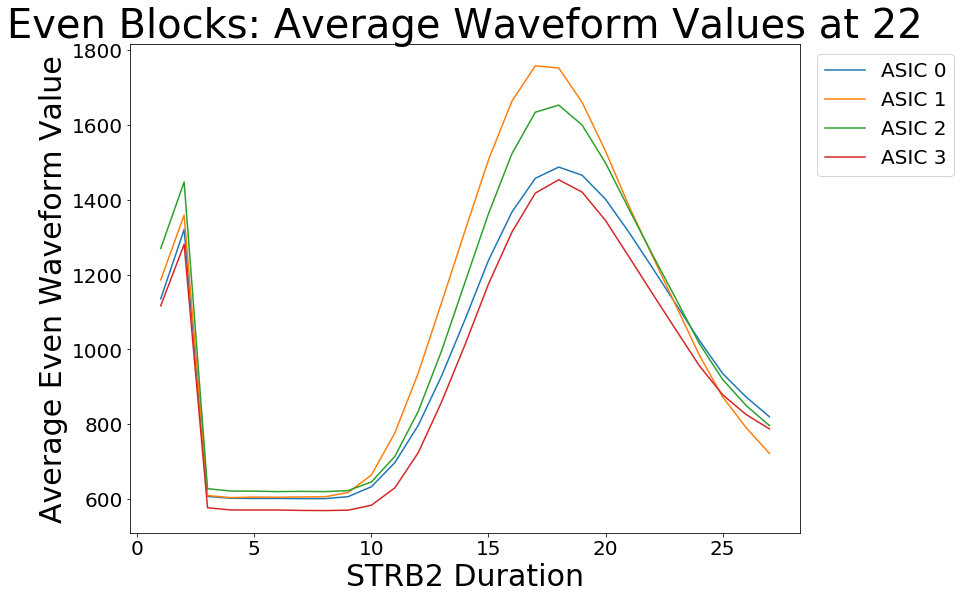

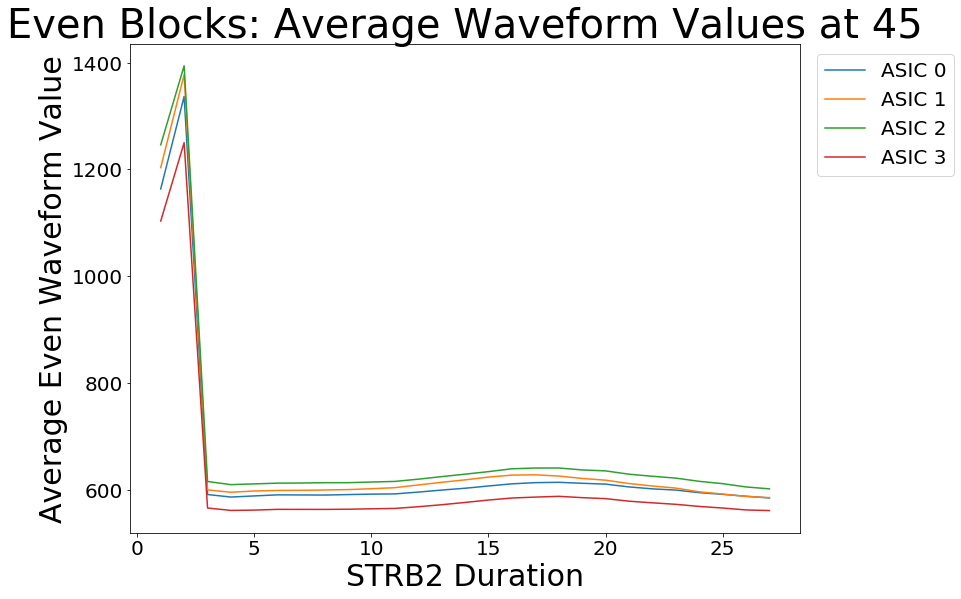

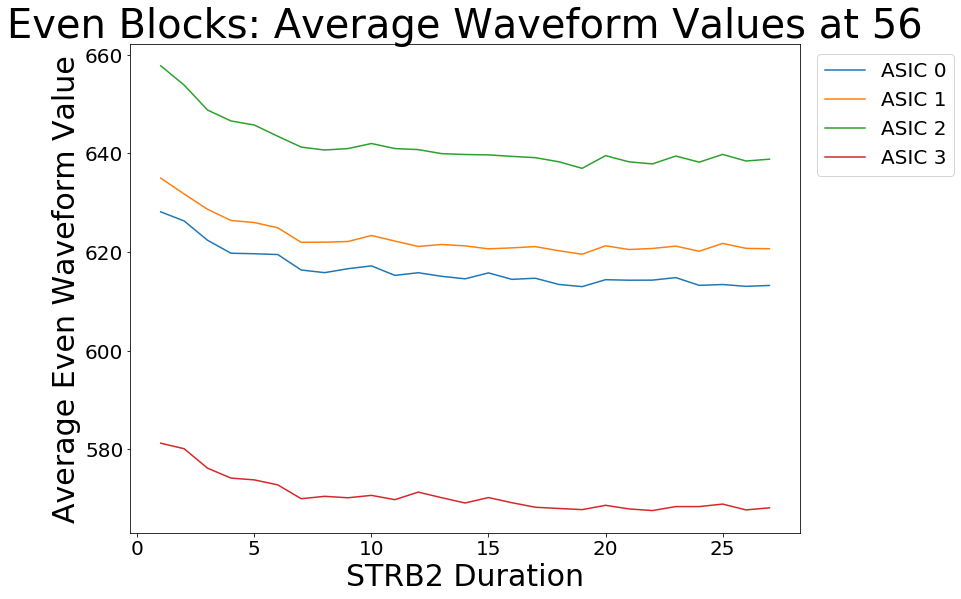

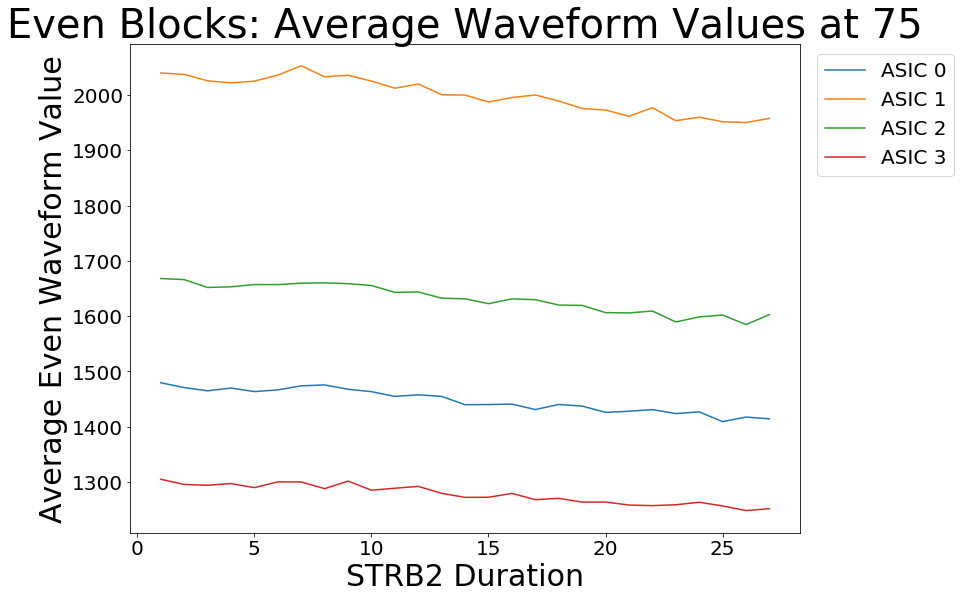

ASIC 0
[1153.6280827366745, 1310.9602595296026, 560.03019467620186, 554.02819170358441, 554.15133171912828, 552.67262614223284, 550.31665332265811, 549.84326269492203, 550.61176951369021, 549.04690048939642, 545.82360097323601, 538.2301092043682, 530.41228070175441, 521.46573705179287, 513.15682362330404, 506.31450320512823, 501.22514970059882, 497.21938775510205, 495.01609736945426, 495.4357316087308, 495.00201288244767, 496.56715806715806, 498.5546150745667, 498.53154639175256, 499.88001605136435, 499.26949494949497, 499.21691464369616]
ASIC 1
[1239.1770087509944, 1377.9156528791566, 467.80492649980135, 461.76761981474021, 460.66061339790156, 459.27969805323801, 456.20096076861489, 455.63454618152741, 457.30241111565181, 457.86541598694942, 457.20316301703161, 455.30850234009358, 459.35007974481658, 468.66613545816733, 488.30486831604151, 511.18870192307691, 537.96167664670656, 559.52708006279431, 575.59285433843741, 584.62691996766375, 584.03099838969399, 580.50819000819001, 575.884

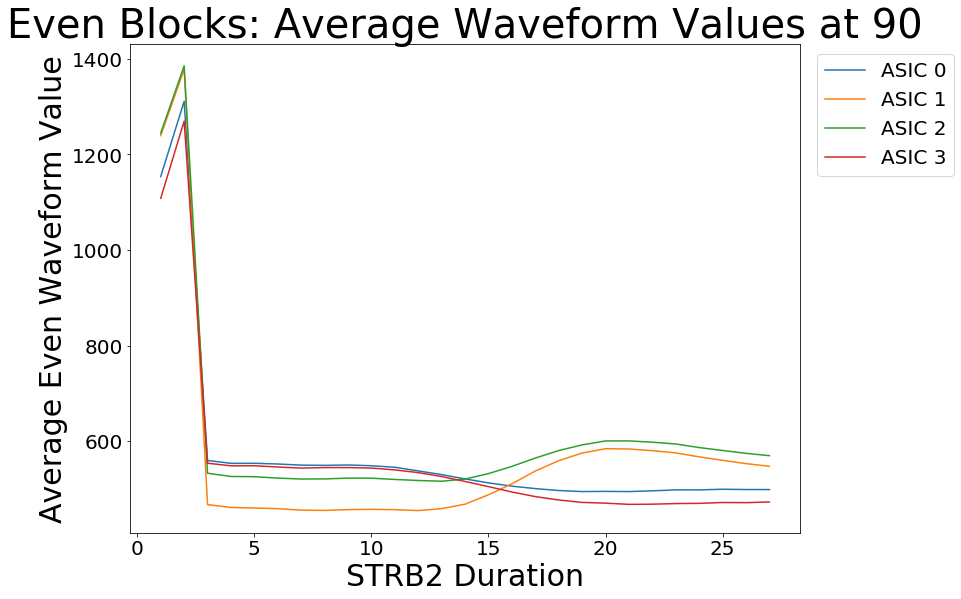

In [18]:
# Graph the value of each average waveform at 22, 56, 75, and 90. 
durations = [i for i in range(1,28)]

# at value 22
for ASIC in range(4):
    value = []
    for run in range(27):
        value.append(STRB2_even[ASIC][run][22])
    plt.plot(durations, value, label = 'ASIC ' + str(ASIC))
    print('ASIC ' + str(ASIC))
    print(value)
plt.title('Even Blocks: Average Waveform Values at 22')
plt.xlabel('STRB2 Duration')
plt.ylabel('Average Even Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

# at value 45
for ASIC in range(4):
    value = []
    for run in range(27):
        value.append(STRB2_even[ASIC][run][45])
    plt.plot(durations, value, label = 'ASIC ' + str(ASIC))
plt.title('Even Blocks: Average Waveform Values at 45')
plt.xlabel('STRB2 Duration')
plt.ylabel('Average Even Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

# at value 56
for ASIC in range(4):
    value = []
    for run in range(27):
        value.append(STRB2_even[ASIC][run][56])
    plt.plot(durations, value, label = 'ASIC ' + str(ASIC))
plt.title('Even Blocks: Average Waveform Values at 56')
plt.xlabel('STRB2 Duration')
plt.ylabel('Average Even Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

# at value 75
for ASIC in range(4):
    value = []
    for run in range(27):
        value.append(STRB2_even[ASIC][run][75])
    plt.plot(durations,value, label = 'ASIC ' + str(ASIC))
plt.title('Even Blocks: Average Waveform Values at 75')
plt.xlabel('STRB2 Duration')
plt.ylabel('Average Even Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

# at value 90
for ASIC in range(4):
    value = []
    for run in range(27):
        value.append(STRB2_even[ASIC][run][90])
    plt.plot(durations,value, label = 'ASIC ' + str(ASIC))
    print('ASIC ' + str(ASIC))
    print(value)
plt.title('Even Blocks: Average Waveform Values at 90')
plt.xlabel('STRB2 Duration')
plt.ylabel('Average Even Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

In [18]:
# The best STRB2 duration seems to be between 3 and 8